In [1]:
import os
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from sklearn import datasets, metrics, linear_model
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd

In [2]:
dir_data = '../data/ml100marathon'
train_app = os.path.join(dir_data, 'train_data.csv')
test_app = os.path.join(dir_data, 'test_features.csv')

In [3]:
df_train = pd.read_csv(train_app)
#df_train.head()
df_test = pd.read_csv(test_app)
#df_test.head()

In [4]:
df_train['deferred_income']*=-1
df_test['deferred_income']*=-1
df_train['restricted_stock_deferred']*=-1
df_test['restricted_stock_deferred']*=-1
train_Y = df_train['poi']
test_name = df_test['name']
#result_back = df_test[df_test['name']=='TOTAL']
df_train_d = df_train.drop(['director_fees','name','loan_advances','email_address','restricted_stock_deferred','poi'] , axis=1)
df_test_d = df_test.copy()
#df_test_d[df_test_d['name'] == 'TOTAL'] = np.nan
df_test_d = df_test_d.drop(['director_fees','name','loan_advances','restricted_stock_deferred','email_address'] , axis=1)
#result_back_d = result_back.drop(['director_fees','loan_advances','name','restricted_stock_deferred','email_address'] , axis=1)

print(df_train_d.values.shape)
print(df_test_d.values.shape)
df = pd.concat([df_train_d,df_test_d])
print(df.values.shape)
train_num = train_Y.shape[0]
#df

(113, 16)
(33, 16)
(146, 16)


In [5]:
def fill_and_scale(in_df,fill_by,scale_by):
    if fill_by == 'mean':
        df1 = in_df.fillna(in_df.mean())
    elif fill_by == 'median':
        df1 = in_df.fillna(in_df.median())
    elif fill_by == 'zero':
        df1 = in_df.fillna(0)

    if scale_by == 'std':
        df1[df1.columns] = StandardScaler().fit_transform(df1[df1.columns])
    elif scale_by == 'minmax':
        df1[df1.columns] = MinMaxScaler().fit_transform(df1[df1.columns])
    return df1

def run_and_predict(model,_train_X,_train_Y,_test_X,_test_Y):
    model.fit(_train_X,_train_Y)
    y_test_pred = model.predict(_test_X)
    ascore = accuracy_score(y_test_pred,_test_Y)
    prob_out = model.predict_proba(_test_X)[:,1];
    print("prob_out.shape",prob_out.shape)
    print("_test_Y.shape",_test_Y.shape)
    aucscore = roc_auc_score(_test_Y,prob_out)
    print("accuracy:", ascore)
    print("aucscore:",aucscore)
    return y_test_pred, prob_out, ascore, aucscore
def write_prob (filename, _test_name, _y_prob):
    y_pred_df = pd.DataFrame(data={'name':_test_name.values,'poi':_y_prob})
    y_pred_df.to_csv(filename,index=None)
def clip_outliers (in_df, col, th_low, th_high):
    out_df = in_df.copy()
    out_df[col] = in_df[col].clip(th_low,th_high)
    return out_df
def log1p (in_df, col):
    out_df = in_df.copy()
    out_df[col] = np.log1p(in_df[col])
    return out_df

In [6]:
# #02_19_1
# #02_19_2 : include load_advances
# df2 = fill_and_scale(df,'median','minmax')
# estimator2 = GradientBoostingClassifier()

# df2 = log1p(df2,['bonus','deferral_payments','deferred_income','loan_advances','exercised_stock_options','expenses','long_term_incentive'])
# df2 = log1p(df2,['restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'])

# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_19_2.csv',test_name,outcome)

In [7]:
# # #02_19_3
# df2 = df[['bonus','deferral_payments','deferred_income','exercised_stock_options','salary','total_stock_value','long_term_incentive','restricted_stock','other','total_payments']]

# df2 = fill_and_scale(df,'median','minmax')
# estimator2 = GradientBoostingClassifier()

# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_19_3.csv',test_name,outcome)

0.882352941176
prob_out.shape (29,)
_test_Y.shape (29,)
accuracy: 0.896551724138
aucscore: 0.825
[  2.50791299e-03   9.96041277e-01   9.91223954e-01   9.60715709e-04
   8.69438181e-03   9.92443607e-01   5.46464637e-01   7.88368509e-05
   7.79070456e-05   2.86640758e-04   2.71257277e-04   7.88368509e-05
   7.88368509e-05   7.88368509e-05   8.81178817e-03   7.89306033e-05
   7.23106890e-05   9.26776828e-01   1.72359755e-03   7.88368509e-05
   9.56263415e-01   1.40492890e-02   7.79070456e-05   6.66364021e-04
   7.88368509e-05   7.88368509e-05   5.51823730e-04   7.88368509e-05
   3.97500387e-04   1.05391175e-03   7.23106890e-05   7.14578480e-05
   4.83208349e-03]
(33,)


In [7]:
# # 02_19_4
# df_clp = df.copy()
# df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
# df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
# df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
# df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
# df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
# df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
# df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
# df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
# df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
# df_clp = clip_outliers(df_clp,'other', 0, 2e6)
# df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
# df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
# df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
# df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
# df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)
# df2 = fill_and_scale(df,'median','minmax')
# estimator2 = GradientBoostingClassifier()

# df2 = log1p(df2,['bonus','deferral_payments','deferred_income','exercised_stock_options','expenses','long_term_incentive'])
# df2 = log1p(df2,['restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'])

# train_X = df2[:train_num]
# test_X = df2[train_num:]
# train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
# print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

# prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
# outcome = estimator2.predict_proba(test_X)[:,1]
# print(outcome)
# print(outcome.shape)
# write_prob('02_19_4.csv',test_name,outcome)

0.882352941176
prob_out.shape (29,)
_test_Y.shape (29,)
accuracy: 0.896551724138
aucscore: 0.815
[  1.19163612e-02   9.96066567e-01   9.91480073e-01   1.46872950e-03
   8.69438181e-03   9.95199646e-01   4.13663663e-02   7.88368509e-05
   7.79070456e-05   2.86640758e-04   2.71257277e-04   7.88368509e-05
   7.88368509e-05   7.88368509e-05   1.19447073e-02   7.89306033e-05
   7.23106890e-05   9.01426096e-01   2.44167233e-03   7.88368509e-05
   9.61194521e-01   1.57203919e-02   7.79070456e-05   6.66364021e-04
   7.88368509e-05   7.88368509e-05   5.51823730e-04   7.88368509e-05
   3.97500387e-04   1.05391175e-03   7.23106890e-05   7.14578480e-05
   2.42501396e-03]
(33,)


In [14]:
# 02_19_5
df_clp = df.copy()
df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
df_clp = clip_outliers(df_clp,'other', 0, 2e6)
df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)
df2 = fill_and_scale(df,'mean','minmax')
estimator2 = GradientBoostingClassifier()

df2 = log1p(df2,['bonus','deferral_payments','deferred_income','exercised_stock_options','expenses','long_term_incentive'])
df2 = log1p(df2,['restricted_stock','salary','shared_receipt_with_poi','to_messages','total_payments','total_stock_value'])

train_X = df2[:train_num]
test_X = df2[train_num:]
train_X1, test_X1, train_Y1, test_Y1 = train_test_split(train_X,train_Y,test_size=0.25,random_state=48)
print(cross_val_score(estimator2, train_X1, train_Y1, cv=5).mean())

prob_out2, pred_out2, accu2, auc2 = run_and_predict(estimator2,train_X1, train_Y1, test_X1, test_Y1)
outcome = estimator2.predict_proba(test_X)[:,1]
print(outcome)
print(outcome.shape)
write_prob('02_19_5.csv',test_name,outcome)

0.881617647059
prob_out.shape (29,)
_test_Y.shape (29,)
accuracy: 0.862068965517
aucscore: 0.885
[  7.88603945e-03   3.72132268e-01   2.02444698e-02   8.16047875e-04
   5.93827925e-03   4.97574829e-03   9.98212750e-01   2.68703131e-03
   1.09473025e-03   1.27002627e-03   8.84147571e-04   8.84147571e-04
   7.38291427e-04   1.09455859e-03   2.93408213e-01   1.94930708e-03
   5.75371340e-04   4.60449461e-02   2.91386244e-02   3.50063610e-04
   9.87792873e-01   1.35157691e-03   8.87584260e-04   8.18708454e-04
   8.87584260e-04   1.68828608e-03   7.38291427e-04   4.19254020e-04
   1.21489823e-03   4.43573321e-03   4.19254020e-04   6.67559485e-04
   6.10558031e-01]
(33,)


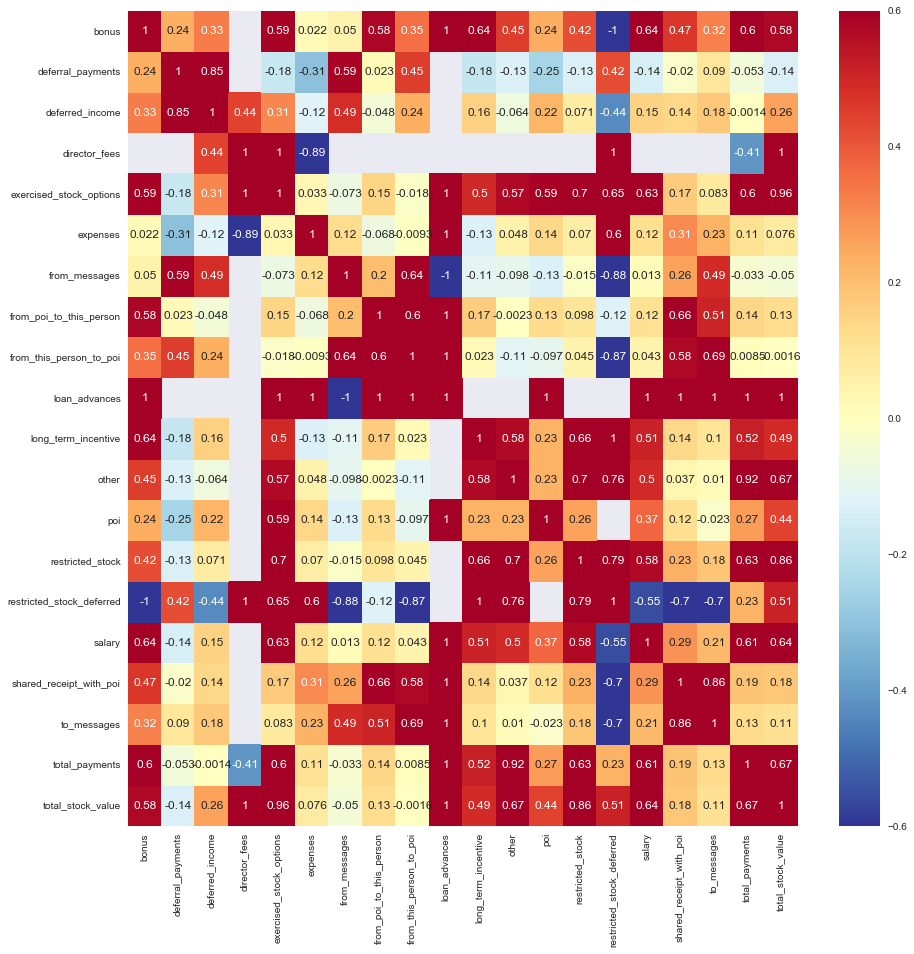

In [8]:
# all_corr = df_train.corr()
# plt.figure(figsize=(15,15))
# heatmap = sns.heatmap(all_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
# plt.show()

In [6]:
len(df.columns)

16

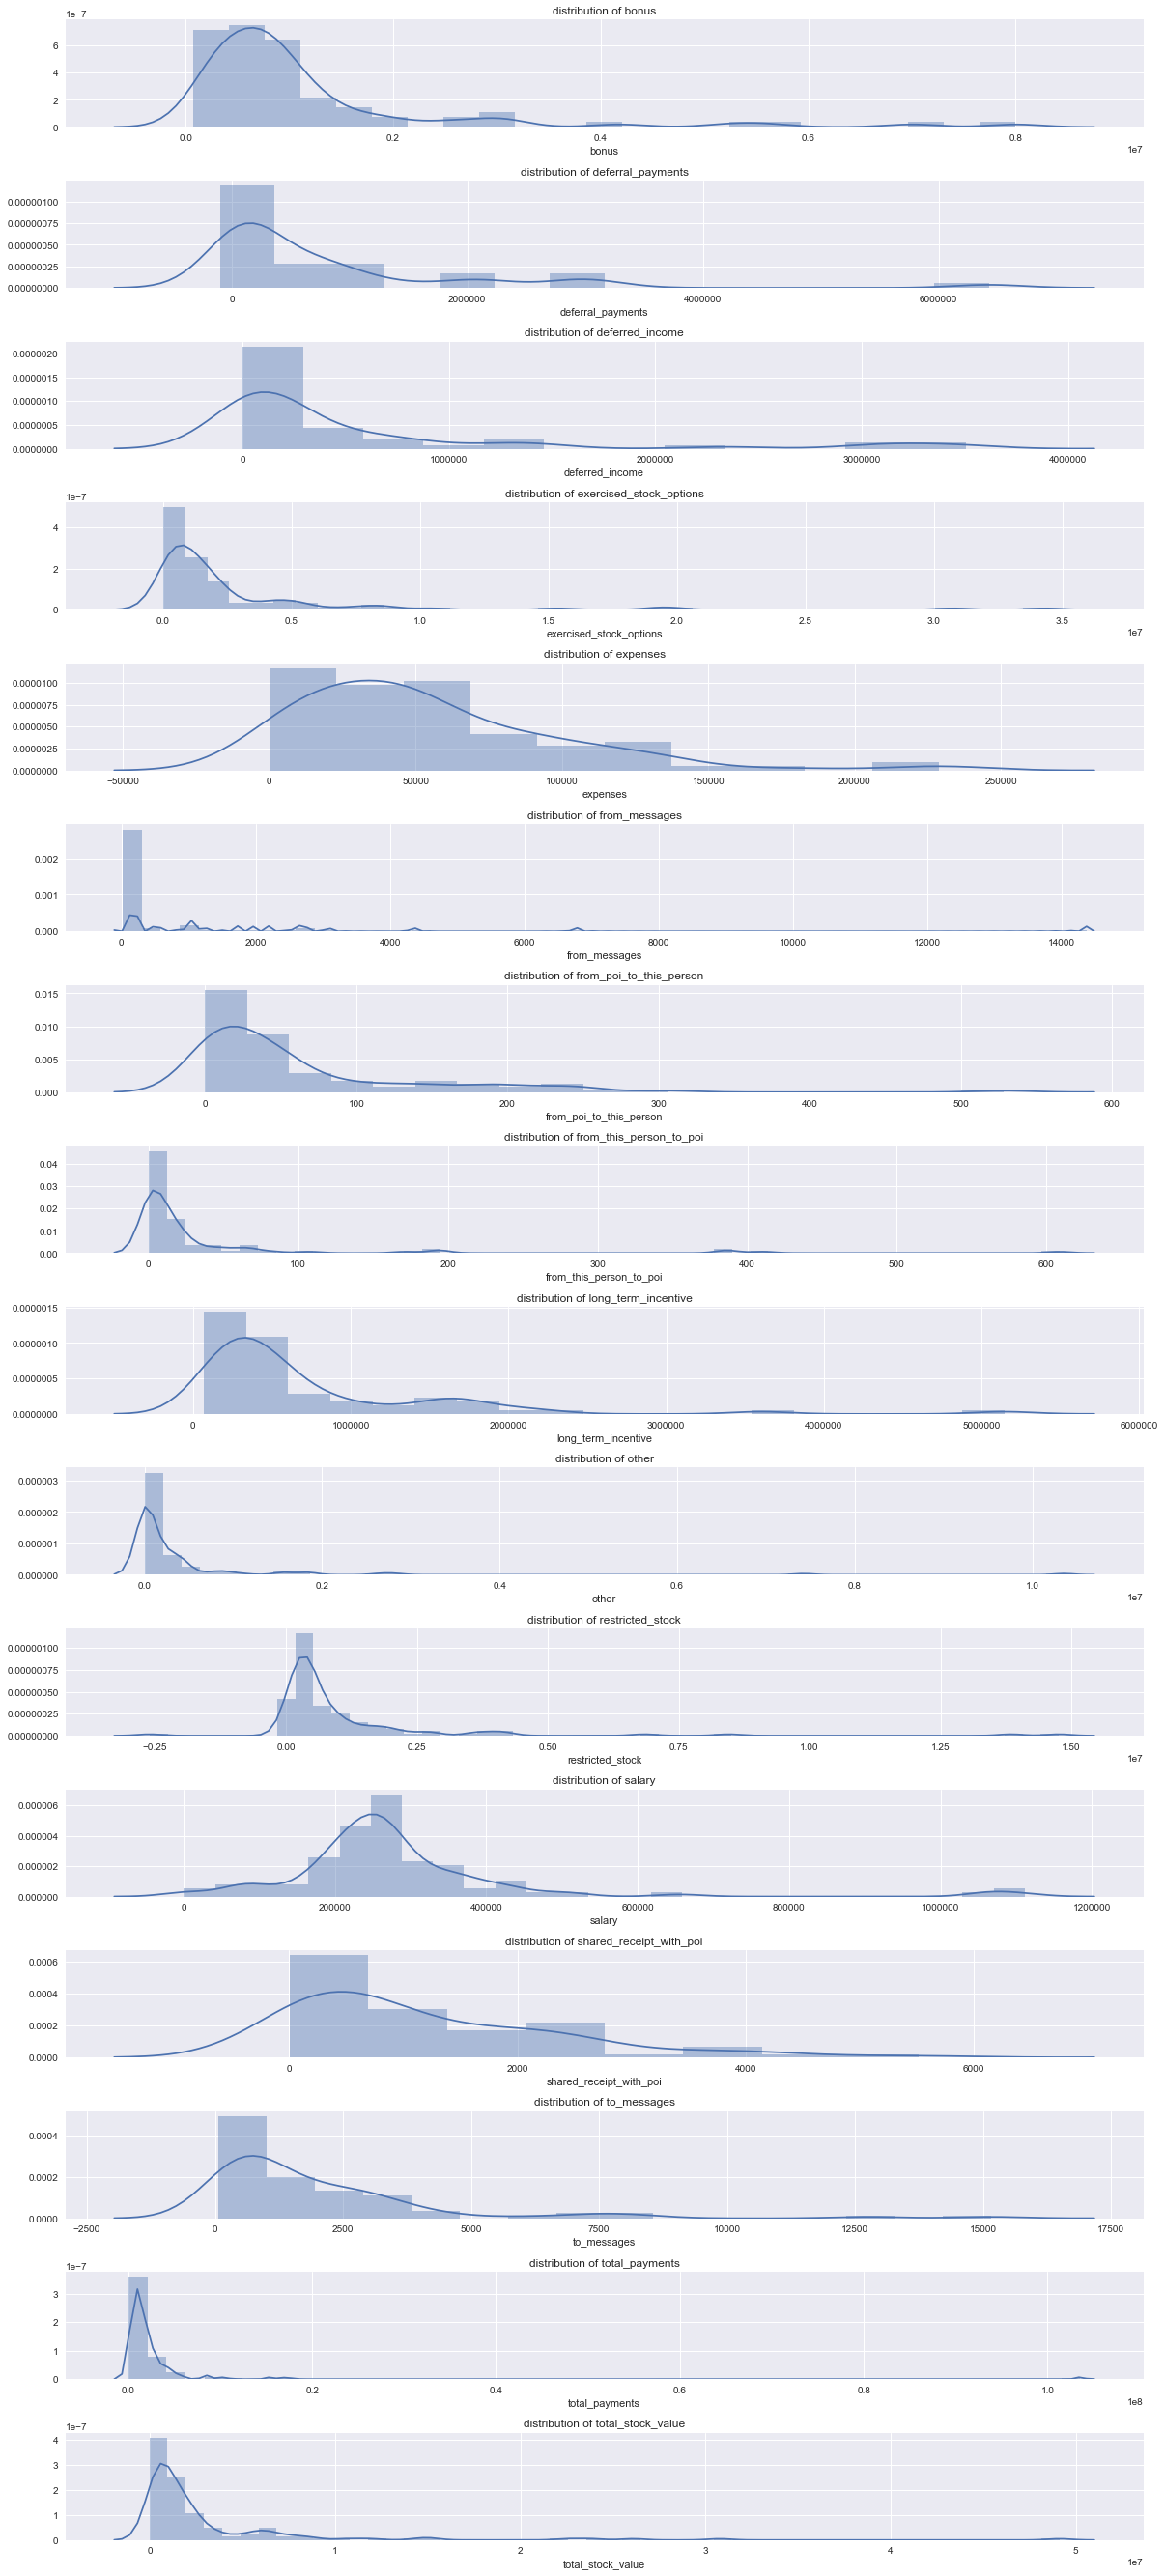

In [7]:
fig_num = len(df.columns)
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for col in df:
    plt.subplot(fig_num,1,index)
    plt.title("distribution of "+col)
    sns.distplot(df[col].dropna())
    index += 1
plt.show()

In [14]:
df_clp = df.copy()
df_clp = clip_outliers(df_clp,'bonus', 0, 4e6)
df_clp = clip_outliers(df_clp,'deferral_payments', 0, 3e6)
df_clp = clip_outliers(df_clp,'deferred_income', 0, 2e6)
df_clp = clip_outliers(df_clp,'exercised_stock_options', 0, 1e6)
df_clp = clip_outliers(df_clp,'expenses', 0, 2e5)
df_clp = clip_outliers(df_clp,'from_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'from_poi_to_this_person', 0, 300)
df_clp = clip_outliers(df_clp,'from_this_person_to_poi', 0, 100)
df_clp = clip_outliers(df_clp,'long_term_incentive', 0, 3e6)
df_clp = clip_outliers(df_clp,'other', 0, 2e6)
df_clp = clip_outliers(df_clp,'restricted_stock', 0, 5e6)
df_clp = clip_outliers(df_clp,'salary', 0, 7e5)
df_clp = clip_outliers(df_clp,'to_messages', 0, 1000)
df_clp = clip_outliers(df_clp,'total_payments', 0, 2e7)
df_clp = clip_outliers(df_clp,'total_stock_value', 0, 1e7)

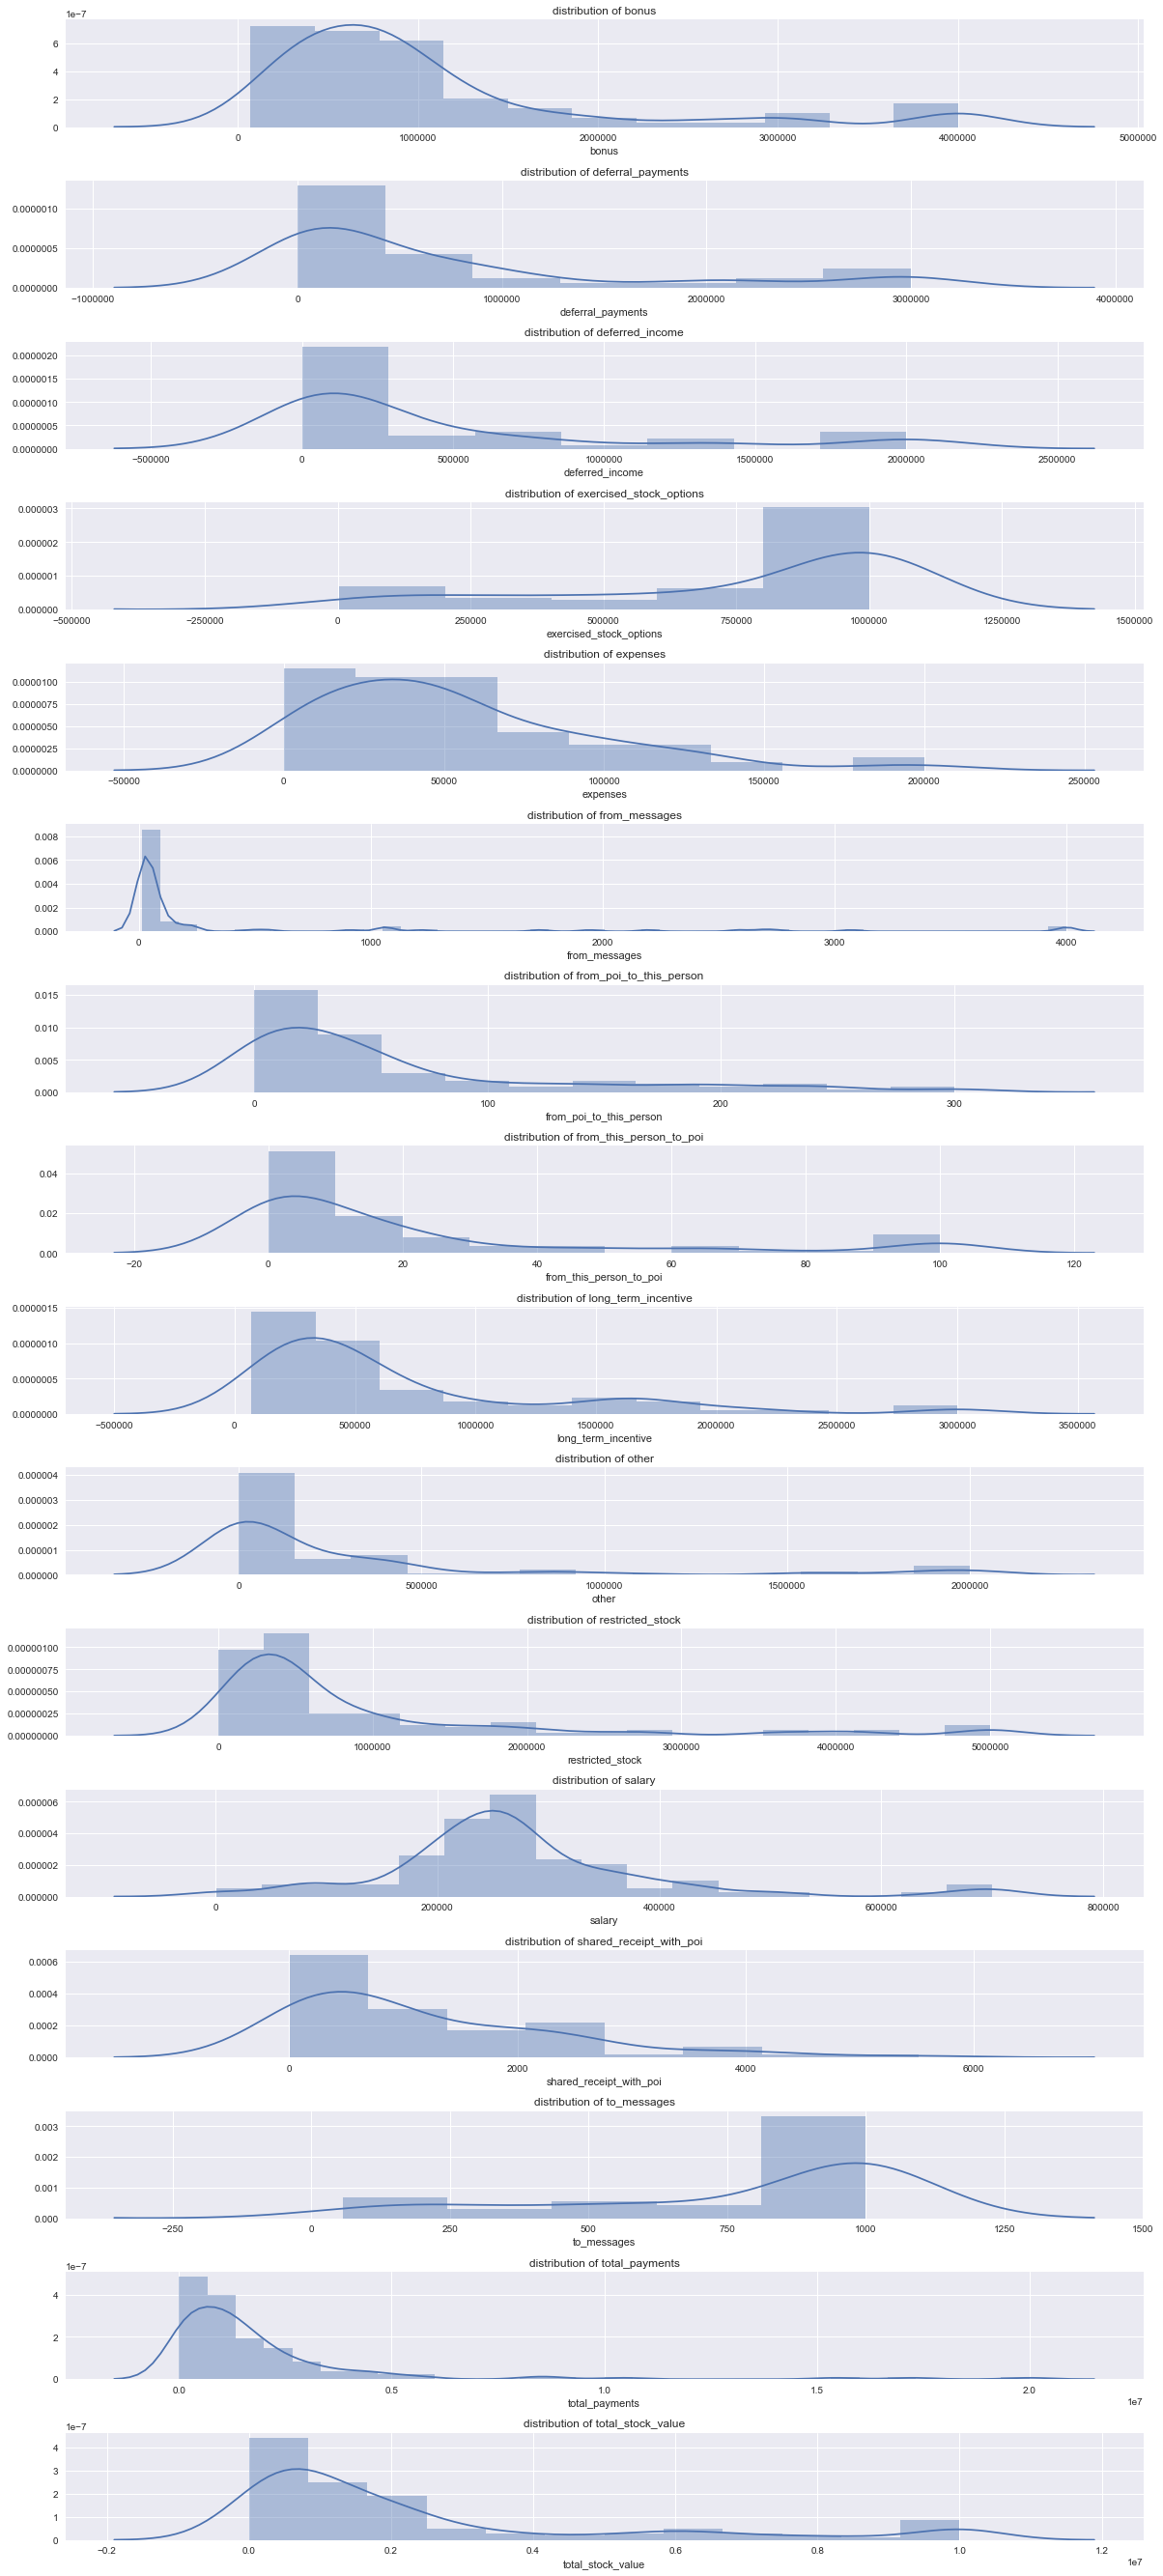

In [13]:
fig_num = len(df.columns)
plt.figure(figsize=(20,fig_num*3))
plt.subplots_adjust(hspace=0.5)
index = 1
for col in df:
    plt.subplot(fig_num,1,index)
    plt.title("distribution of "+col)
    sns.distplot(df_clp[col].dropna())
    index += 1
plt.show()

# vocabulary
* repayment: 貸款的還款
* loan advances: 貸款預付款
* promissory note: 本票
* severance: 遣散